In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [21]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [22]:
# Create dataframe with all control records
control_df = df.query('group =="control"')

# Compute completion rate
control_cr = control_df['completed'].mean()

# Display completion rate
control_cr

0.3719951923076923

In [23]:
# Create dataframe with all experiment records
experiment_df = df.query('group =="experiment"')

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()

# Display completion rate
experiment_ctr

0.3935334872979215

In [24]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [25]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    sample_df = df.sample(size,replace=True)
    sample_control_ctr = sample_df.query('group == "control"').completed.mean()
    sample_experiment_ctr = sample_df.query('group == "experiment"').completed.mean()
    diffs.append(sample_experiment_ctr - sample_control_ctr)

In [26]:
# convert to numpy array
diffs = np.array(diffs)

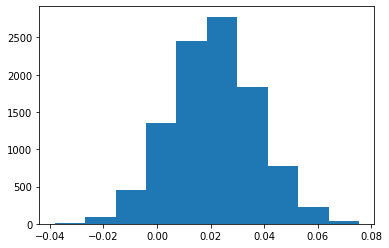

In [27]:
# plot distribution
_=plt.hist(diffs)

In [28]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

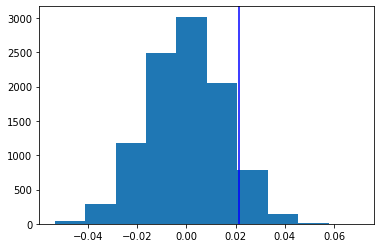

In [29]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff,color='blue')

In [ ]:
# compute p value
p_value = (null_vals > obs_diff).mean()
p_value

With p_value > alpha value(0.05), Null hypothesis cant be rejected and results are statistically insignificant